# **Welcome to our second section of presentation** 

# **Agendas**



*   Using of Keras preprocessing how to read input directory
*   Data Augmentation.
*   KFolding
*   Training 
*   And Finally we will review all the methods.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.3.0
!pip install keras==2.4.0

     |████████████████████████████████| 320.4 MB 57 kB/s 
     |████████████████████████████████| 20.1 MB 1.0 MB/s 
     |████████████████████████████████| 459 kB 84.0 MB/s 
     |████████████████████████████████| 2.9 MB 56.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

     |████████████████████████████████| 170 kB 13.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt # used to plot fig
import seaborn as sns # used to plot fig as
from mlxtend.plotting import plot_confusion_matrix  # used to draw confusion matrix
import os  # This is used to read files to indict floders in the operating system
import cv2 # cv2 is used in opencv and deeplearning foe images transform, flip, change color and so on..

from sklearn.model_selection import train_test_split # this is used in Machine learning so i used it to split the train and test file 80/20 respectively
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix. 
from sklearn.preprocessing import LabelBinarizer  #Fit label binarizer and transform multi-class labels to binary labels
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Input, Dropout, Flatten, BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

Using TensorFlow backend.


Simple way for reading and preparing dataset in simple way

In [ ]:
Data = np.load("/content/drive/MyDrive/upload file/Data_.npy")
Labels = np.load("/content/drive/MyDrive/upload file/Labels_.npy")

In [ ]:
Data = Data/255.0

In [ ]:
labelb = LabelBinarizer()
Lables = labelb.fit_transform(Labels)
Labels = to_categorical(Labels) 

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 20,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.05,
                                   shear_range = 0.2,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,
                                   vertical_flip = False,
                                   fill_mode = "nearest")

Fold #1
[INFO] compiling model...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
19/19 [==============================] - 46s 2s/step - loss: 1.9883 - accuracy: 0.2258 - val_loss: 1.6405 - val_accuracy: 0.2408
Epoch 2/15
19/19 [==============================] - 46s 2s/step - loss: 1.7597 - accuracy: 0.2561 - val_loss: 1.5671 - val_accuracy: 0.3096
Epoch 3/15
19/19 [==============================] - 45s 2s/step - loss: 1.6674 - accuracy: 0.2907 - val_loss: 1.5195 - val_accuracy: 0.3391
Epoch 4/15
19/19 [==============================] - 47s 2s/step - loss: 1.6195 - accuracy: 0.3175 - val_loss: 1.4918 - val_accuracy: 0.3710
Epoch 5/15
19/19 [==============================] - 46s 2s/step - loss: 1.5371 - accuracy: 0.3261 - val_loss: 1.4529 - val_accuracy: 0.3907
Epoch 6/15
19/19 [==============================] - 46s 2s/step - loss: 1.5183 - accuracy: 0.3590 - val_loss: 1.4363 - val_accuracy: 0.4152
Epoch 7/15
19/19 [==============================] 

<Figure size 432x288 with 0 Axes>

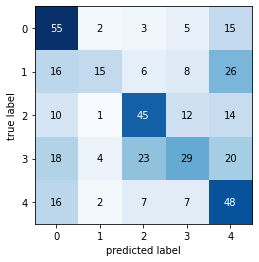

<Figure size 432x288 with 0 Axes>

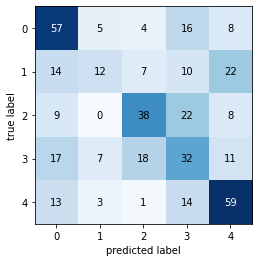

<Figure size 432x288 with 0 Axes>

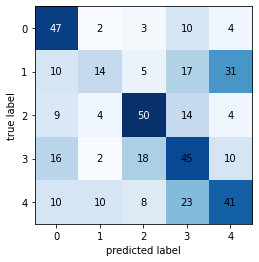

<Figure size 432x288 with 0 Axes>

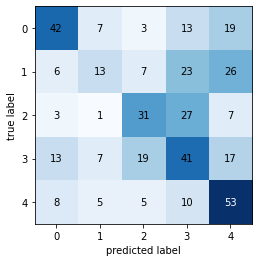

In [ ]:
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNetV2

kf = KFold(4, shuffle= True, random_state = 42)

conf = []
oos_y = []
oos_pred = []

fold = 0
for train, test in kf.split(Data):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = Data[train]
    y_train = Labels[train]
    x_test = Data[test]
    y_test = Labels[test]
    
    baseModel = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    # construct the head of the model that will be placed on top of the
    # the base model
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(5, activation="softmax")(headModel)
    # place the head FC model on top of the base model (this will become
    # the actual model we will train)
    model = Model(inputs=baseModel.input, outputs=headModel)
    # loop over all layers in the base model and freeze them so they will
    # *not* be updated during the first training process
    for layer in baseModel.layers:
      layer.trainable = False
    INIT_LR = 1e-4
    EPOCHS = 15
    BS = 64
    print("[INFO] compiling model...")
    opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
      metrics=["accuracy"])
    
    his = model.fit_generator( train_datagen.flow(x_train, y_train, batch_size= BS),
                              steps_per_epoch=len(x_train) // BS,
                              validation_data=(x_test, y_test),
                              validation_steps=len(x_test) // BS,
                              epochs=EPOCHS)
    
    pred = model.predict(x_test)

    oos_y.append(y_test)
    pred = np.argmax(pred,axis=1)
    oos_pred.append(pred)
    
    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")

    # Measure this fold's BCE
    from sklearn.metrics import confusion_matrix, classification_report
    predict = model.predict(x_test, batch_size=BS)
    predict = np.argmax(predict, axis=1)
    print(classification_report(y_test.argmax(axis=1), predict, labels=labelb.classes_))

    cm = confusion_matrix(y_test.argmax(axis=1), predict, labels=labelb.classes_)
    np.set_printoptions(precision=2)
    conf.append(cm)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm)
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}") 


The confusion matrix of the 10 fold values
[array([[55,  2,  3,  5, 15],
       [16, 15,  6,  8, 26],
       [10,  1, 45, 12, 14],
       [18,  4, 23, 29, 20],
       [16,  2,  7,  7, 48]]), array([[57,  5,  4, 16,  8],
       [14, 12,  7, 10, 22],
       [ 9,  0, 38, 22,  8],
       [17,  7, 18, 32, 11],
       [13,  3,  1, 14, 59]]), array([[47,  2,  3, 10,  4],
       [10, 14,  5, 17, 31],
       [ 9,  4, 50, 14,  4],
       [16,  2, 18, 45, 10],
       [10, 10,  8, 23, 41]]), array([[42,  7,  3, 13, 19],
       [ 6, 13,  7, 23, 26],
       [ 3,  1, 31, 27,  7],
       [13,  7, 19, 41, 17],
       [ 8,  5,  5, 10, 53]])]
The sum of the 10 fold values
[[201  16  13  44  46]
 [ 46  54  25  58 105]
 [ 31   6 164  75  33]
 [ 64  20  78 147  58]
 [ 47  20  21  54 201]]
The average of the above fold values
[[20.1  1.6  1.3  4.4  4.6]
 [ 4.6  5.4  2.5  5.8 10.5]
 [ 3.1  0.6 16.4  7.5  3.3]
 [ 6.4  2.   7.8 14.7  5.8]
 [ 4.7  2.   2.1  5.4 20.1]]
The sum of the 10 fold values.
The mean of t

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f60a4735650>)

<Figure size 432x288 with 0 Axes>

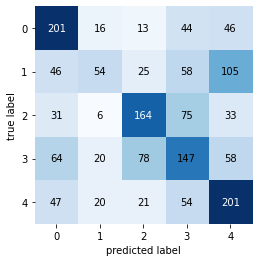

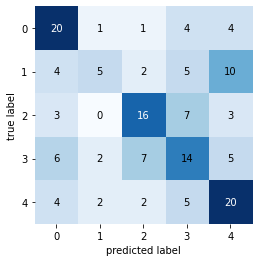

In [ ]:
print("The confusion matrix of the 10 fold values")
print(conf)
confeyu= np.sum(conf, axis=0)
print("The sum of the 10 fold values")
print(confeyu)
confeyu1 = confeyu / 10.0
np.set_printoptions(precision=2)
print("The average of the above fold values")
print(confeyu1)
eyu1 = confeyu1.astype("int")
plt.figure()
leyu = ["Porn", "Non_pron"]
print("The sum of the 10 fold values.")
plot_confusion_matrix(confeyu, leyu)
print("The mean of the 10 fold values.")
plot_confusion_matrix(eyu1, leyu)